In [1]:
import pandas as  pd
import nibabel as nb
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
from sklearn.model_selection import train_test_split

### Visualize data (each image size (113, 137, 113))

Text(0.5, 1.0, 'Gray matter (Traverse)')

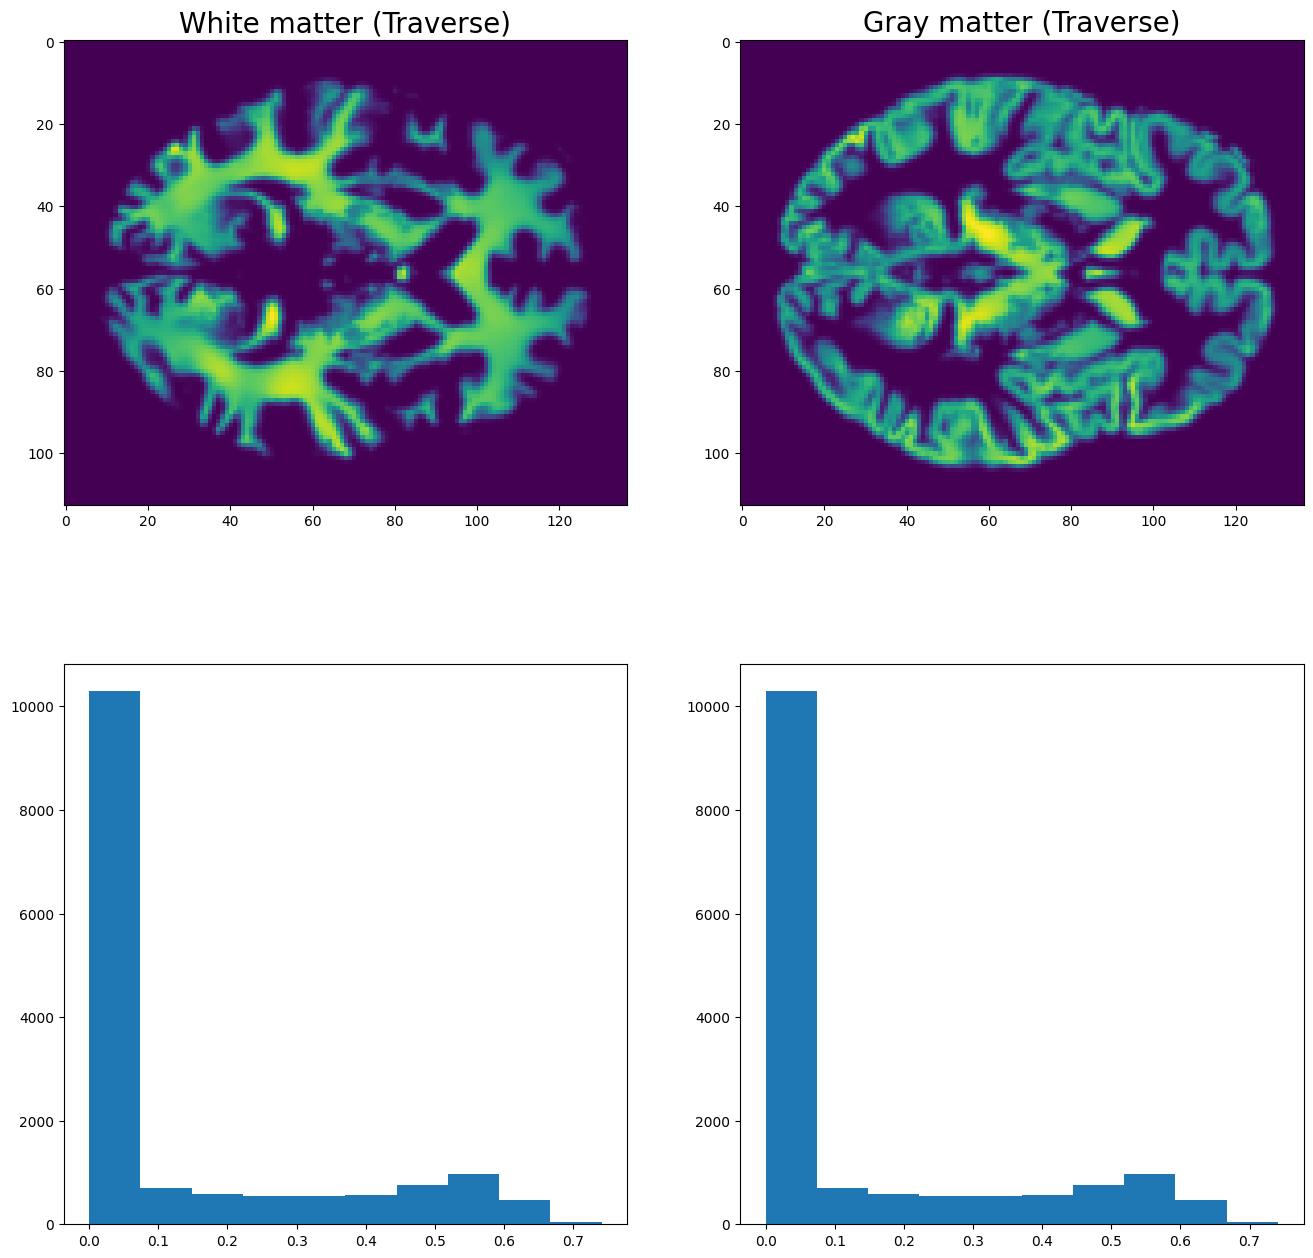

In [5]:
slice = 50
demo_filepath_whitematter = '/cis/home/jdey4/data_MRI/sub-A00008326/mri/mwp2sub-A00008326_T1w.nii'
demo_filepath_graymatter = '/cis/home/jdey4/data_MRI/sub-A00008326/mri/mwp1sub-A00008326_T1w.nii'

img_whitematter = nb.load(demo_filepath_whitematter).get_fdata()
sliced_img_whitematter = img_whitematter[:,:,slice]

img_graymatter = nb.load(demo_filepath_graymatter).get_fdata()
sliced_img_graymatter = img_graymatter[:,:,slice]

fig, ax = plt.subplots(2,2, figsize=(16,16))
ax[0][0].imshow(sliced_img_whitematter)
ax[0][1].imshow(sliced_img_graymatter)
ax[1][0].hist(sliced_img_whitematter.reshape(-1))
ax[1][1].hist(sliced_img_whitematter.reshape(-1))

ax[0][0].set_title('White matter (Traverse)', fontsize=20)
ax[0][1].set_title('Gray matter (Traverse)', fontsize=20)

### Analyze class distribution and age 

In [3]:
df = pd.read_excel('/Users/jayantadey/data_MRI/subjects_age_sex_data_MRI.xlsx')
df.head()

,ID,Age,Sex,Dataset,Dataset-ID
0,sub-ABIDE1050339,18.0000,MALE,ABIDE,50339
1,sub-ABIDE1050701,18.0000,MALE,ABIDE,50701
2,sub-ABIDE1050445,18.1383,MALE,ABIDE,50445
3,sub-ABIDE1050459,18.1547,MALE,ABIDE,50459
4,sub-ABIDE1050341,18.2000,FEMALE,ABIDE,50341


Text(0, 0.5, 'Age')

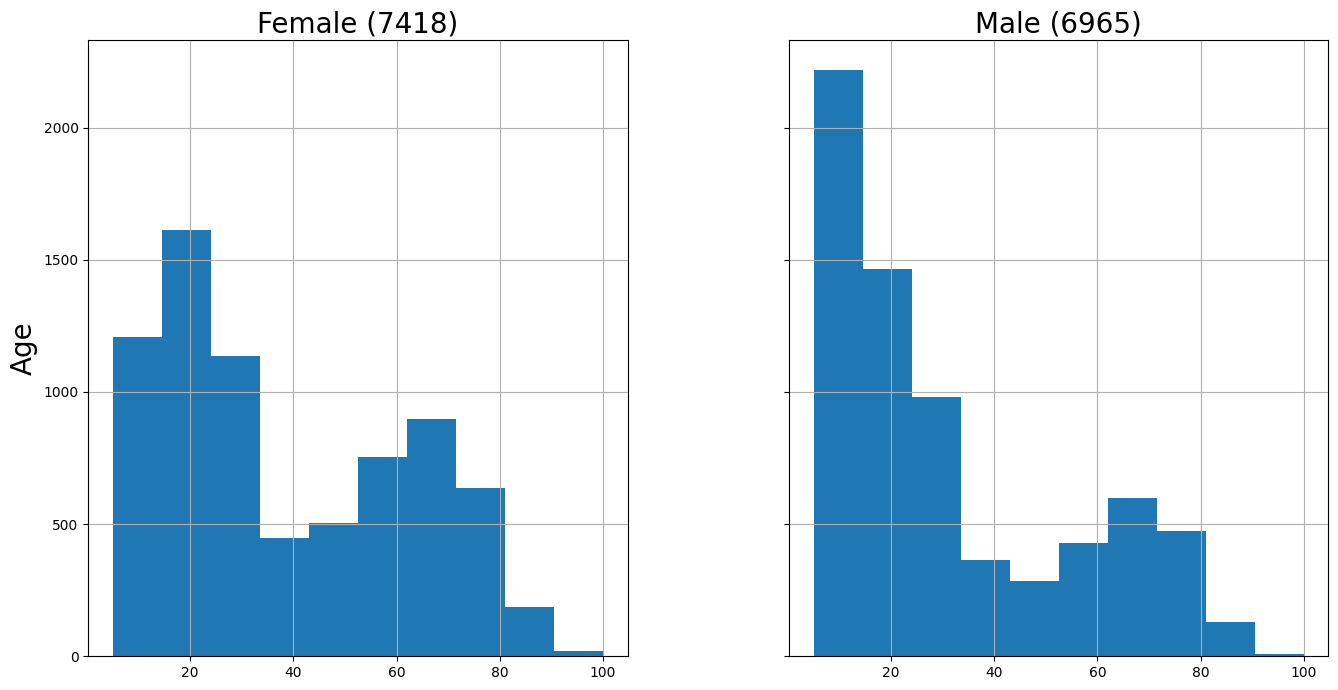

In [4]:
fig, ax = plt.subplots(1,2, figsize=(16,8), sharey=True)

total_female = len(df[df['Sex']=='FEMALE'])
total_male = len(df[df['Sex']=='MALE'])

df[df['Sex']=='FEMALE'].hist(ax=ax[0])
df[df['Sex']=='MALE'].hist(ax=ax[1])

ax[0].set_title('Female ('+str(total_female)+')', fontsize=20)
ax[1].set_title('Male ('+str(total_male)+')', fontsize=20)

ax[0].set_ylabel('Age', fontsize=20)

### Load data and build (feature, label)

In [5]:
path = '/Users/jayantadey/data_MRI/'
subjects = os.listdir(path)
X = []
y = []
IDs = set(df['ID'])
for subject in subjects:
    if subject in IDs:
        #print(df[df['ID']==subject]['Sex'])
        sex = int(df[df['ID']==subject]['Sex'].item()=='FEMALE')
        current_file = os.path.join(path, subject)
        tmp = []
        save = True
        for file in glob.glob(current_file+'/mri/*'):
            try:
                img = nb.load(file).get_fdata()
                #print(img.shape)
                tmp.append(img.reshape(-1))
            except:
                save = False
                print(file,' corrupted')

        '''if len(tmp)<2:
            print(subject, ' has less files')'''
            
        if save and len(tmp)==2:
            X.append(np.array(tmp).reshape(1,-1))
            y.append(sex)
    else:
        print(subject, " missing")
X = np.concatenate(X,axis=0)

sub-HBN_CBIC_NDARJW697MYZ  missing
sub-HBN_CBIC_NDARRX084UML  missing
sub-HBN_CBIC_NDARLR168NP5  missing
sub-HBN_RU_NDARYX806FL1  missing
sub-HBN_CUNY_NDARGJ317VC9  missing
sub-HBN_RU_NDARCB142ZPB  missing
sub-HBN_CBIC_NDARJK482MZB  missing
sub-HBN_CBIC_NDARLK690ZK9  missing
sub-HBN_CBIC_NDARRN996JZK  missing
sub-HBN_CUNY_NDARXW455MJ1  missing
sub-HBN_CBIC_NDARJC399UW7  missing
sub-HBN_RU_NDARHP924ZHW  missing
sub-HBN_CBIC_NDARAR935TGZ  missing
sub-HBN_CUNY_NDARUZ408MRL  missing
sub-HBN_CBIC_NDARUZ221YL6  missing
sub-HBN_CBIC_NDARCC140AAK  missing
sub-HBN_CBIC_NDARMX259HUH  missing
sub-HBN_CBIC_NDARJL656RDA  missing
sub-HBN_RU_NDARWF259RB2  missing
sub-HBN_CBIC_NDARAU939WUK  missing
sub-HBN_CBIC_NDARVV095BWU  missing
sub-HBN_RU_NDARRK882CLT  missing
sub-HBN_SI_NDAREE196FEG  missing
sub-HBN_CBIC_NDARPJ395JDY  missing
sub-HBN_SI_NDARXE684LUY  missing
sub-HBN_SI_NDARRK457MBX  missing
sub-HBN_CBIC_NDARWV826NEC  missing
sub-HBN_CBIC_NDARWV952EZT  missing
sub-HBN_RU_NDAREN519BLJ  missing
sub

In [6]:
X.shape

(2368, 3498706)

In [7]:
np.mean(y)

0.5025337837837838

In [12]:
reps = 5
accuracy = 0.0

for _ in tqdm(range(reps)):
    x_train, x_test, y_train, y_test = train_test_split(
                    X, y, train_size=0.6, random_state=0, stratify=y)
    clf = RandomForestClassifier(n_estimators=1000)
    clf.fit(x_train,y_train)
    accuracy += np.mean(clf.predict(x_test)==y_test)

print('Accuracy is ',accuracy/reps)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [3:25:06<00:00, 2461.40s/it]

Accuracy is  0.7995780590717301


In [15]:
clf.feature_importances_

array([0., 0., 0., ..., 0., 0., 0.])

### Notes

1. propensity matching
2. run sporf and morf
3. see feature importace